In [35]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [68]:
filename = "../experiments/loading_pool.csv"
file_title = os.path.splitext(os.path.basename(filename))[0]
df = pd.read_csv(filename)
df

,url,metric,policy,temp,seconds
0,http://360game.360.cn/,firstPaint,vanilla,cold,6.060058
1,http://360game.360.cn/,firstPaint,vanilla,hot,1.246466
2,http://360game.360.cn/,firstContentfulPaint,vanilla,cold,6.060058
3,http://360game.360.cn/,firstContentfulPaint,vanilla,hot,1.246466
4,http://360game.360.cn/,largestContentfulPaint,vanilla,cold,6.727110
...,...,...,...,...,...
382399,http://zhanzhang.so.com/sitetool/sitemap,loadEventEnd,block3p,hot,8.370133
382400,http://zhanzhang.so.com/sitetool/sitemap,firstContentfulPaint,block3p,cold,2.532364
382401,http://zhanzhang.so.com/sitetool/sitemap,firstContentfulPaint,block3p,hot,7.340639
382402,http://zhanzhang.so.com/sitetool/sitemap,largestContentfulPaint,block3p,cold,2.708952


In [69]:
ptdf = pd.pivot_table(data=df, values='seconds', index=['url', 'metric'], columns=['policy', 'temp'], aggfunc=np.median)
ptdf


policy                                                 block3p             \
temp                                                      cold        hot   
url                         metric                                          
http://360game.360.cn/      domContentLoadedEventEnd  5.284349   4.862117   
                            domInteractive            5.273639   4.853959   
                            firstContentfulPaint      1.369761   1.133789   
                            firstPaint                1.369761   1.133789   
                            largestContentfulPaint    2.342105   1.814900   
...                                                        ...        ...   
https://zoom.us/phonesystem domInteractive            6.771180  12.437135   
                            firstContentfulPaint      1.035763   8.871382   
                            firstPaint                1.035763   8.871382   
                            largestContentfulPaint    2.740012  10.218653   
                            loadEventEnd              7.133099  12.823468   

policy                                               page-length            \
temp                                                        cold       hot   
url                         metric                                           
http://360game.360.cn/      domContentLoadedEventEnd    6.003277  5.156156   
                            domInteractive              5.991968  5.148415   
                            firstContentfulPaint        1.412461  1.248559   
                            firstPaint                  1.412461  1.248559   
                            largestContentfulPaint      2.199266  2.271068   
...                                                          ...       ...   
https://zoom.us/phonesystem domInteractive              4.949190  6.795933   
                            firstContentfulPaint        1.116065  0.861854   
                            firstPaint                  1.116065  0.861854   
                            largestContentfulPaint      2.686052  2.293429   
                            loadEventEnd                4.956482  6.803383   

policy                                               split-key            \
temp                                                      cold       hot   
url                         metric                                         
http://360game.360.cn/      domContentLoadedEventEnd  6.437896  6.037139   
                            domInteractive            6.430095  6.026635   
                            firstContentfulPaint      1.447056  1.102648   
                            firstPaint                1.447056  1.102648   
                            largestContentfulPaint    2.672075  1.312248   
...                                                        ...       ...   
https://zoom.us/phonesystem domInteractive            6.303163  5.990007   
                            firstContentfulPaint      1.019840  0.830525   
                            firstPaint                1.019840  0.830525   
                            largestContentfulPaint    2.599833  2.393041   
                            loadEventEnd              6.729594  6.427136   

policy                                                 vanilla             
temp                                                      cold        hot  
url                         metric                                         
http://360game.360.cn/      domContentLoadedEventEnd  6.316454   6.239783  
                            domInteractive            6.305750   6.232211  
                            firstContentfulPaint      1.436505   1.135984  
                            firstPaint                1.436505   1.135984  
                            largestContentfulPaint    1.972105   1.417257  
...                                                        ...        ...  
https://zoom.us/phonesystem domInteractive            4.298083  14.021671  
   

In [81]:
ptdf.loc['https://www.youtube.com/']

policy                      block3p            page-length             \
temp                           cold        hot        cold        hot   
metric                                                                  
domContentLoadedEventEnd  10.452573  24.959470   11.010164  10.870578   
domInteractive            10.403649  24.920858   10.963363  10.836021   
firstContentfulPaint       0.776116  14.842201    0.754231   0.613302   
firstPaint                 0.776116  14.842201    0.754231   0.613302   
largestContentfulPaint    11.473765  19.979934   11.463313   6.599970   
loadEventEnd              12.127342  26.275338   12.264395  12.310373   

policy                    split-key               vanilla             
temp                           cold        hot       cold        hot  
metric                                                                
domContentLoadedEventEnd  10.712853  10.320429  10.659982  24.464090  
domInteractive            10.667344  10.286039  10.612098  24.428499  
firstContentfulPaint       0.804822   0.607133   0.810828  14.622708  
firstPaint                 0.804822   0.607133   0.810828  14.622708  
largestContentfulPaint    11.870198  11.301865   6.269418  21.745937  
loadEventEnd              12.003110  11.608498  12.055108  26.242361

<AxesSubplot:ylabel='Frequency'>

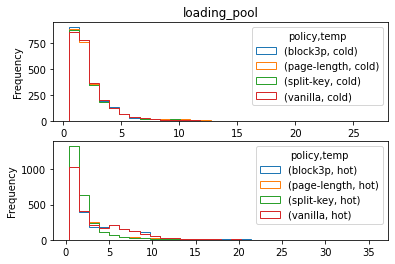

In [70]:
fig, ax = plt.subplots(2, 1)
ptdf.loc[(slice(None), "largestContentfulPaint"), (slice(None), "cold")].plot.hist(bins=30, histtype='step', ax=ax[0], title=file_title)
ptdf.loc[(slice(None), "largestContentfulPaint"), (slice(None), "hot")].plot.hist(bins=30, histtype='step', ax=ax[1])


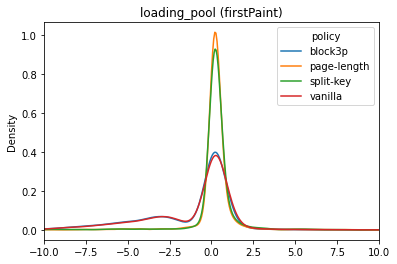

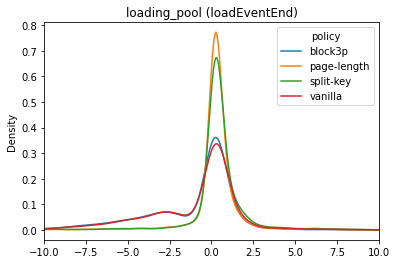

In [71]:
for density_event in ["firstPaint", "loadEventEnd"]:
    colds = ptdf.loc[(slice(None), density_event), (slice(None), "cold")]
    hots = ptdf.loc[(slice(None), density_event), (slice(None), "hot")]
    colds.columns = colds.columns.droplevel(level=1)
    hots.columns = hots.columns.droplevel(level=1)
    loadEventDeltas = (colds - hots)
    ax = loadEventDeltas.plot.density(title=f"{file_title} ({density_event})")
    ax.set_xlim((-10, 10))
    #fig = ax.get_figure()
    #lt.close(fig)

In [72]:
import json

bad_urls = loadEventDeltas.sort_values("vanilla").iloc[:100].reset_index().url.to_list()
bad_url_jobs = [
    { "url": url, "policy": policy, "cache": c }
    for url in bad_urls
        for policy in ["vanilla", "page-length", "split-key", "block3p"]
            for c in (False, True)
]

#with open("bad_url_jobs.json", 'wt', encoding='utf8') as fd:
#    json.dump(bad_url_jobs, fd)

In [73]:
xadf = df[df.url == "https://www.youtube.com/"]
xadf

,url,metric,policy,temp,seconds
91236,https://www.youtube.com/,domInteractive,vanilla,cold,11.641037
91237,https://www.youtube.com/,domInteractive,vanilla,hot,25.901520
91238,https://www.youtube.com/,domContentLoadedEventEnd,vanilla,cold,11.691073
91239,https://www.youtube.com/,domContentLoadedEventEnd,vanilla,hot,25.936135
91240,https://www.youtube.com/,firstPaint,vanilla,cold,0.827240
...,...,...,...,...,...
378051,https://www.youtube.com/,firstContentfulPaint,block3p,hot,14.149349
378052,https://www.youtube.com/,loadEventEnd,block3p,cold,11.531047
378053,https://www.youtube.com/,loadEventEnd,block3p,hot,25.321398
378054,https://www.youtube.com/,largestContentfulPaint,block3p,cold,11.355550


In [74]:
xadf[xadf.metric == "largestContentfulPaint"].sort_values('seconds')

,url,metric,policy,temp,seconds
91270,https://www.youtube.com/,largestContentfulPaint,vanilla,cold,6.231610
91258,https://www.youtube.com/,largestContentfulPaint,vanilla,cold,6.269418
186927,https://www.youtube.com/,largestContentfulPaint,page-length,hot,6.414694
186914,https://www.youtube.com/,largestContentfulPaint,page-length,cold,6.590783
186903,https://www.youtube.com/,largestContentfulPaint,page-length,hot,6.599970
282409,https://www.youtube.com/,largestContentfulPaint,split-key,hot,6.652822
282421,https://www.youtube.com/,largestContentfulPaint,split-key,hot,11.301865
378054,https://www.youtube.com/,largestContentfulPaint,block3p,cold,11.355550
186926,https://www.youtube.com/,largestContentfulPaint,page-length,cold,11.463313
378030,https://www.youtube.com/,largestContentfulPaint,block3p,cold,11.473765
